In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def functop(x):
    return(x*np.exp(1))
def funcbottom(x):
    return(x)
def funcleft(y):
    return(0)
def funcright(y):
    return(2*np.exp(y))


In [3]:
def funcrho(x,y):
    return(x*np.exp(y))

In [4]:
def poisonsolver(xa,xb,ya,yb,n,plot=True):
    x0=np.linspace(xa,xb,num=n)
    y0=np.linspace(ya,yb,num=n)
    h=(yb-ya)/(n-1)                                         #calculate h_y
    W=np.zeros((n,n))
    alpha=((xb-xa)/(yb-ya))**2                              #calculate alpha
    W[0]=funcbottom(x0)
    W[n-1]=functop(x0)
    for i in range(n):
        W[i][0]=funcleft(y0[i])
        W[i][n-1]=funcright(y0[i])                           #set_boundary conditions
    n2=n-2
    R=np.zeros((n2,n2))
    for i in range(n2):
        for j in range(n2):
            R[i][j]=-alpha*funcrho(x0[i+1],y0[j+1])*h**2
    R=np.transpose(R)                                        #get rho
    N2=n2**2
    B=np.zeros((n2,n2))
    B[0]=W[0][1:-1]
    B[n2-1]=W[n-1][1:-1]                                     #get contributions from boundary conditions
    for i in range(n2):
        B[i][0]+=alpha*W[i+1][0]
        B[i][n2-1]+=alpha*W[i+1][n-1]
    A=np.diag(np.full(N2,2+2*alpha))-alpha*np.diag(np.ones(N2-1),1)-alpha*np.diag(np.ones(N2-1),-1)-np.diag(np.ones(N2-n2),n2)-np.diag(np.ones(N2-n2),-n2)
    for i in range(1,n2):
        A[n2*i-1][n2*i]=0
        A[n2*i][n2*i-1]=0                                    #prepare (n-2)*(n-2) dim matrix
    Ainv=np.linalg.inv(A)                                    #invert it
    rho=B-R        
    u=np.dot(Ainv,rho.flatten())                             #get dot product
    matrix = u.reshape((n2,n2))                       
    for i in range(n2):
        for j in range(n2):
            W[i+1][j+1]=matrix[i][j]                        #get the (x,y) table
    if plot==True:                                          #get plot
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        X,Y=np.meshgrid(x0,y0)
        surf = ax.plot_surface(X, Y, W, cmap=plt.cm.viridis,
                       linewidth=0, antialiased=True)
        ax.set_ylabel('y')
        ax.set_xlabel('x')
        ax.set_title('Solution of Poisson equation')
        plt.show()
    return(W)

y points are in columns and x points are in rows.


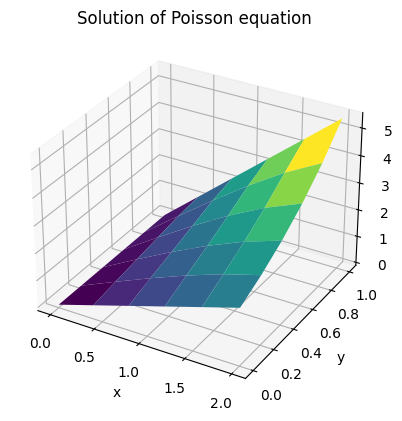

,0,1,2,3,4,5
0,0.0,0.400000,0.800000,1.200000,1.600000,2.000000
1,0.0,0.559062,1.102373,1.612571,2.068650,2.442806
2,0.0,0.702959,1.380857,2.007108,2.552319,2.983649
3,0.0,0.851623,1.674970,2.439382,3.109599,3.644238
4,0.0,0.996774,1.971592,2.898590,3.742728,4.451082
5,0.0,1.087313,2.174625,3.261938,4.349251,5.436564


In [5]:
print('y points are in columns and x points are in rows.')
pd.DataFrame(poisonsolver(0,2,0,1,6))